### Plotted percentiles of CAPE and differences in two epochs

In [22]:
#importing all the necessary packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray
import netCDF4
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
import matplotlib
from mpl_toolkits.basemap import Basemap

In [23]:
dir="../CAPE/"
ds_cape = xarray.open_mfdataset([dir+'60.nc',dir+'70.nc',dir+'80.nc',dir+'90.nc',dir+'00.nc',dir+'10.nc'])
ds_cape=ds_cape.sel(latitude=slice('30','26'),longitude=slice('94','98'))

In [24]:
ds_cape

<xarray.Dataset>
Dimensions:    (longitude: 15, latitude: 16, time: 525960)
Coordinates:
  * longitude  (longitude) float32 94.0 94.25 94.5 94.75 ... 97.0 97.25 97.5
  * latitude   (latitude) float32 29.75 29.5 29.25 29.0 ... 26.5 26.25 26.0
  * time       (time) datetime64[ns] 1960-01-01 ... 2019-12-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 dask.array<chunksize=(87672, 16, 15), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-08-01 11:42:02 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [25]:
x1=ds_cape.cape
print('value of 98th percentile for the dataset for years 1960 to 1989:',np.percentile(x1, 98))
threshold_cape = np.percentile(x1, 98)
threshold_cape

value of 98th percentile for the dataset for years 1960 to 1989: 1594.0458984375


1594.0458984375

In [26]:
# for percentile more than 98
array_cape = [[] for _ in range(61)]
# for percentile more than 98
for i in range(1960, 2020):
                    startdate = datetime(year=i, month= 1 , day= 1)
                    enddate = datetime(year=i, month= 12, day=31 )
                    startdate,enddate
                    da = ds_cape.sel(time=slice(startdate, enddate),latitude=slice('30','26'),longitude=slice('94','98'))
                    a=da.cape
                    b1=np.where(a > threshold_cape, 1, 0)
                    y1 = np.nansum(b1,axis= 1)
                    z1 = np.nansum(y1,axis= 1)
                    p1=np.nansum(z1)
                    array_cape=np.append(array_cape,p1)
                    
from scipy.stats import linregress
x_cape = np.arange(1960, 2020)
print(linregress(x_cape,array_cape)) 

LinregressResult(slope=49.96593498193942, intercept=-57331.160979901804, rvalue=0.09932841795891036, pvalue=0.450201114676422, stderr=65.725433738778)


## CIN

In [27]:
dir="../CINE/"
ds_cin = xarray.open_mfdataset([dir+'60.nc',dir+'70.nc',dir+'80.nc',dir+'90.nc',dir+'00.nc',dir+'10.nc'])
ds_cin=ds_cin.sel(latitude=slice('30','26'),longitude=slice('94','98'))

In [ ]:
x1=ds_cin.cin
threshold_cin = np.nanpercentile(x1, 2)

In [31]:
# for percentile less than 2
array_cin = [[] for _ in range(61)]

for i in range(1960, 2020):
                    startdate = datetime(year=i, month= 1 , day= 1)
                    enddate = datetime(year=i, month= 12, day=31 )
                    startdate,enddate
                    da = ds_cin.sel(time=slice(startdate, enddate),latitude=slice('30','26'),longitude=slice('94','98')) 
                    a=da.cin
    #                a=np.nan_to_num(a,nan=10000.0)
                    b1=np.where(a < threshold_cin, 1, 0)
                    y1 = np.nansum(b1,axis= 1)
                    z1 = np.nansum(y1,axis= 1)
                    p1=np.nansum(z1)
                    array_cin=np.append(array_cin,p1)
                    
x_cin = np.arange(1960, 2020)
print(linregress(x_cin,array_cin)) #x and y are arrays or lists.    

LinregressResult(slope=-42.318282856348986, intercept=97446.27374270631, rvalue=-0.5445825070223667, pvalue=6.853601226110426e-06, stderr=8.557773021864527)


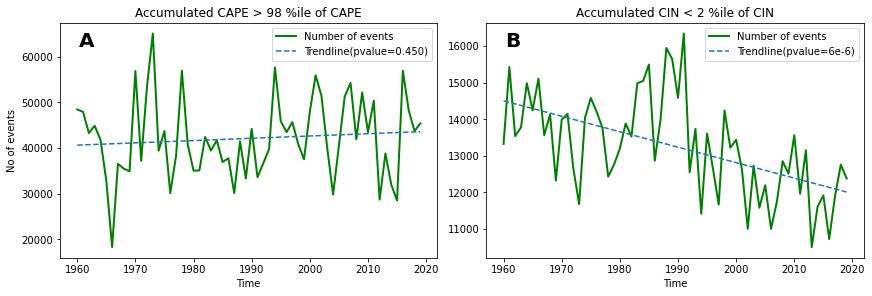

In [34]:
# plotting
import string

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), constrained_layout=True)

axes[0].set_xlabel("Time")
axes[0].set_ylabel("No of events")
axes[0].plot(x_cape, array_cape, color ="green",linewidth =2)
z=np.polyfit(x_cape, array_cape,  1)
axes[0].plot(x_cape,x_cape*z[0]+z[1],'--')
axes[0].legend(['Number of events','Trendline(pvalue=0.450)', 'mean'],loc='upper right')
axes[0].text(.05, 0.9, string.ascii_uppercase[0], transform=axes[0].transAxes, 
            size=20, weight='bold')
axes[0].set_title("Accumulated CAPE > 98 %ile of CAPE")

#plt.plot(x,x*0+array.mean(),'--', color='green', linewidth=1)

axes[1].set_xlabel("Time")
#axes[1].set_ylabel("No of events")
axes[1].plot(x_cin, array_cin, color ="green",linewidth =2)
z=np.polyfit(x_cin, array_cin,  1)
axes[1].plot(x_cin,x_cin*z[0]+z[1],'--')
axes[1].legend(['Number of events','Trendline(pvalue=6e-6)', 'mean'],loc='upper right')
axes[1].text(.05, 0.9, string.ascii_uppercase[1], transform=axes[1].transAxes, 
            size=20, weight='bold')
axes[1].set_title("Accumulated CIN < 2 %ile of CIN")
plt.savefig("Fig4.pdf",format='pdf', dpi=1200)

In [19]:
from scipy.stats import kurtosis
# for Kurtosis
array = [[] for _ in range(61)]
# for percentile more than 98
for i in range(1960, 2020):
                    startdate = datetime(year=i, month= 1 , day= 1)
                    enddate = datetime(year=i, month= 12, day=31 )
                    startdate,enddate
                    da = ds.sel(time=slice(startdate, enddate))
                    a=da.cape
                    b=np.stack(a, axis=1).flatten()
                    c=kurtosis(b,nan_policy='omit',fisher=True)
                    array=np.append(array,c)
linregress(x,array) #x and y are arrays or lists.

LinregressResult(slope=0.025737831323630073, intercept=-32.77692398574908, rvalue=0.1558904845969449, pvalue=0.23427871762273905, stderr=0.021413915704946523)

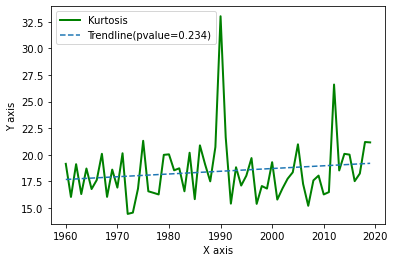

In [20]:
# plotting
x = np.arange(1960, 2020)
#plt.title("Line graph for rainfall more than 50mm for years 1960 to 2019")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, array, color ="green",linewidth =2)
z=np.polyfit(x, array,  1)
plt.plot(x,x*z[0]+z[1],'--')
#plt.plot(x,x*0+array.mean(),'--', color='green', linewidth=1)
plt.legend(['Kurtosis','Trendline(pvalue=0.234)'])
plt.savefig("Supple_Fig_Kurtosis_CAPE.pdf", dpi=300)